In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np

# Step 2: Load the dataset
# Replace 'your_file.csv' with the actual filename
df = pd.read_excel('//content//gym recommendation.xlsx')






In [ ]:
# Tell pandas to display all columns
pd.set_option('display.max_columns', None)

# Now when you call df.head(), it will show all columns
print(df.head())


   ID   Sex  Age  Height  Weight Hypertension Diabetes    BMI        Level  \
0   1  Male   18    1.68    47.5           No       No  16.83  Underweight   
1   2  Male   18    1.68    47.5          Yes       No  16.83  Underweight   
2   3  Male   18    1.68    47.5           No      Yes  16.83  Underweight   
3   4  Male   18    1.68    47.5          Yes      Yes  16.83  Underweight   
4   5  Male   18    1.68    47.5           No       No  16.83  Underweight   

  Fitness Goal      Fitness Type  \
0  Weight Gain  Muscular Fitness   
1  Weight Gain  Muscular Fitness   
2  Weight Gain  Muscular Fitness   
3  Weight Gain  Muscular Fitness   
4  Weight Gain  Muscular Fitness   

                                           Exercises  \
0  Squats, deadlifts, bench presses, and overhead...   
1  Squats, deadlifts, bench presses, and overhead...   
2  Squats, yoga, deadlifts, bench presses, and ov...   
3  Squats, yoga, deadlifts, bench presses, and ov...   
4  Squats, deadlifts, bench presse

In [ ]:
# Drop the recommendation (long text) columns
df = df.drop(columns=["Recommendation"])


In [ ]:
# Step 4: Basic info
print("\n📌 Dataset Info:")
print(df.info())


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            14589 non-null  int64  
 1   Sex           14589 non-null  object 
 2   Age           14589 non-null  int64  
 3   Height        14589 non-null  float64
 4   Weight        14589 non-null  float64
 5   Hypertension  14589 non-null  object 
 6   Diabetes      14589 non-null  object 
 7   BMI           14589 non-null  float64
 8   Level         14589 non-null  object 
 9   Fitness Goal  14589 non-null  object 
 10  Fitness Type  14589 non-null  object 
 11  Exercises     14589 non-null  object 
 12  Equipment     14589 non-null  object 
 13  Diet          14589 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.6+ MB
None


In [ ]:

# Step 5: Check for missing values
print("\n🔍 Missing Values:")
print(df.isnull().sum())


🔍 Missing Values:
ID              0
Sex             0
Age             0
Height          0
Weight          0
Hypertension    0
Diabetes        0
BMI             0
Level           0
Fitness Goal    0
Fitness Type    0
Exercises       0
Equipment       0
Diet            0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Drop 'ID' if it's not useful
df = df.drop(columns=['ID'])

In [ ]:
# Step 2: Encode categorical features
label_encoders = {}
categorical_cols = ['Sex', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type']


In [ ]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for future use

# Step 3: Separate features (X) and targets (Y)
X = df.drop(columns=['Exercises', 'Diet', 'Equipment'])
Y = df[['Exercises', 'Diet', 'Equipment']]


In [ ]:
target_encoders = {}
for col in Y.columns:
    le = LabelEncoder()
    Y[col] = le.fit_transform(Y[col])
    target_encoders[col] = le


<ipython-input-9-0db6cbcd714f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[col] = le.fit_transform(Y[col])
<ipython-input-9-0db6cbcd714f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[col] = le.fit_transform(Y[col])
<ipython-input-9-0db6cbcd714f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [ ]:
# Step 4: Encode target variables (Exercises, Diet, Equipment) properly
from sklearn.preprocessing import LabelEncoder

target_encoders = {}
for col in Y.columns:
    le = LabelEncoder()
    Y[col] = le.fit_transform(Y[col].astype(str))  # Properly overwrite the column with numeric labels
    target_encoders[col] = le


<ipython-input-10-d01394b422a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[col] = le.fit_transform(Y[col].astype(str))  # Properly overwrite the column with numeric labels
<ipython-input-10-d01394b422a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[col] = le.fit_transform(Y[col].astype(str))  # Properly overwrite the column with numeric labels
<ipython-input-10-d01394b422a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("✅ Preprocessing complete. Shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

✅ Preprocessing complete. Shapes:
X_train: (11671, 10)
y_train: (11671, 3)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the base estimator
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Wrap the base estimator with MultiOutputClassifier
multi_model = MultiOutputClassifier(base_estimator, n_jobs=-1) # Use n_jobs=-1 for parallel processing

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the base estimator
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Wrap the base estimator with MultiOutputClassifier
multi_model = MultiOutputClassifier(base_estimator, n_jobs=-1) # Use n_jobs=-1 for parallel processing

# Train the model
multi_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


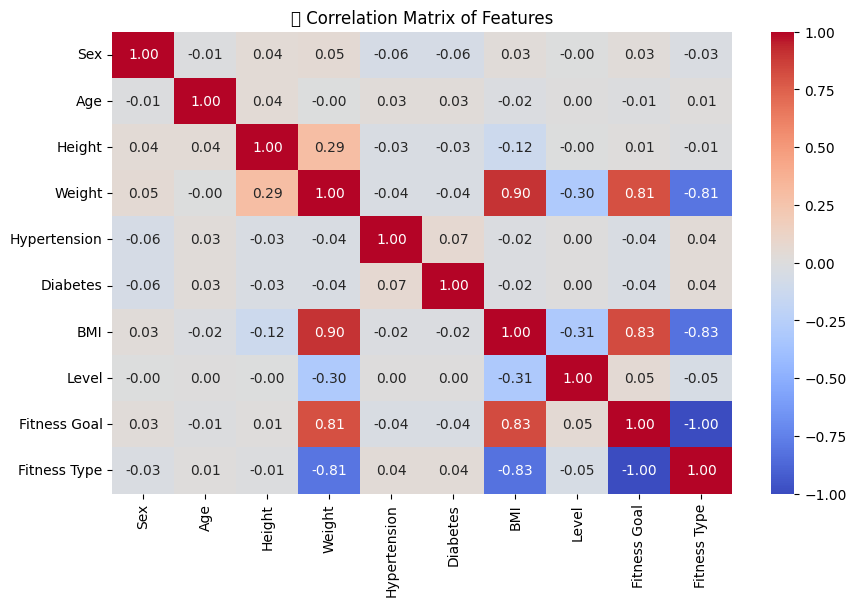

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only include numeric columns for correlation
numeric_df = X.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📈 Correlation Matrix of Features")
plt.show()


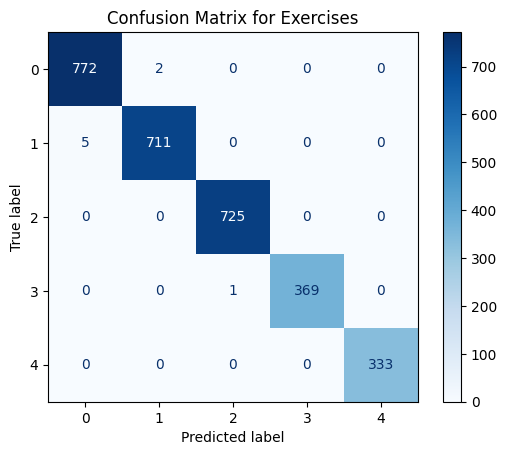

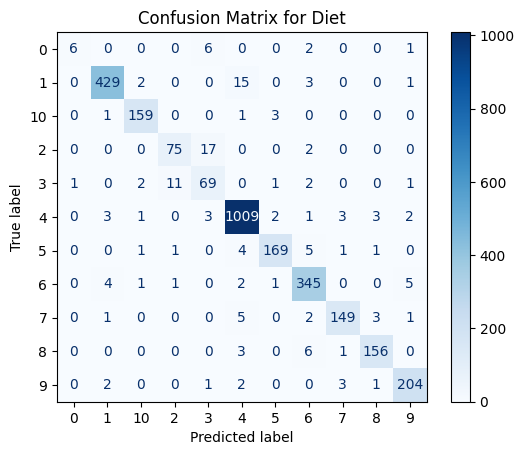

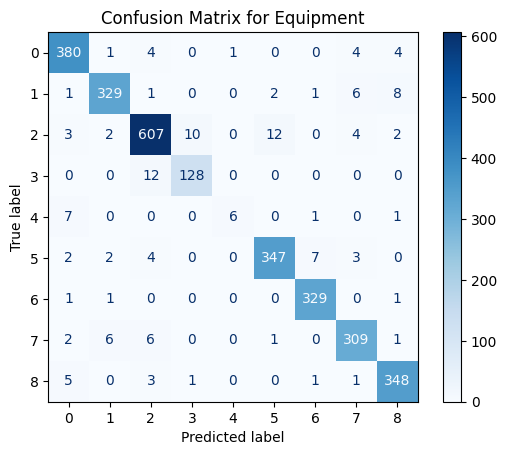

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict
y_pred = multi_model.predict(X_test)

# Step 2: Plot confusion matrix for each output
for i, col in enumerate(y_test.columns):
    cm = confusion_matrix(y_test[col], y_pred[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_encoders[col].classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {col}")
    plt.show()


<ipython-input-17-52670371a1cf>:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


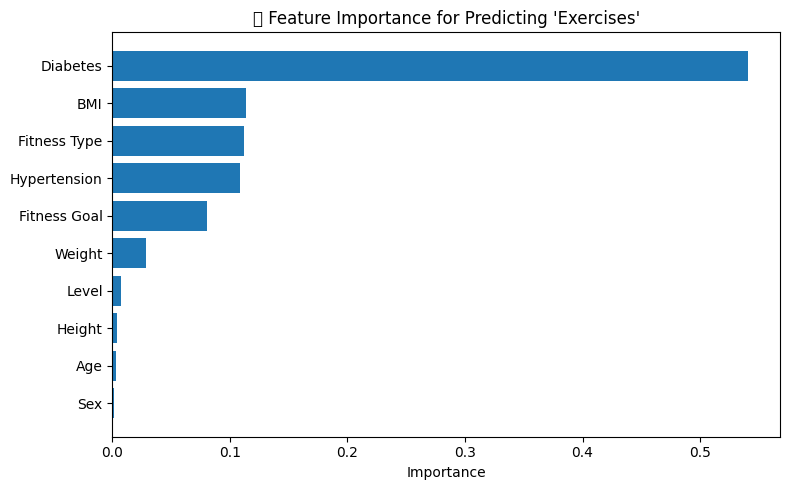

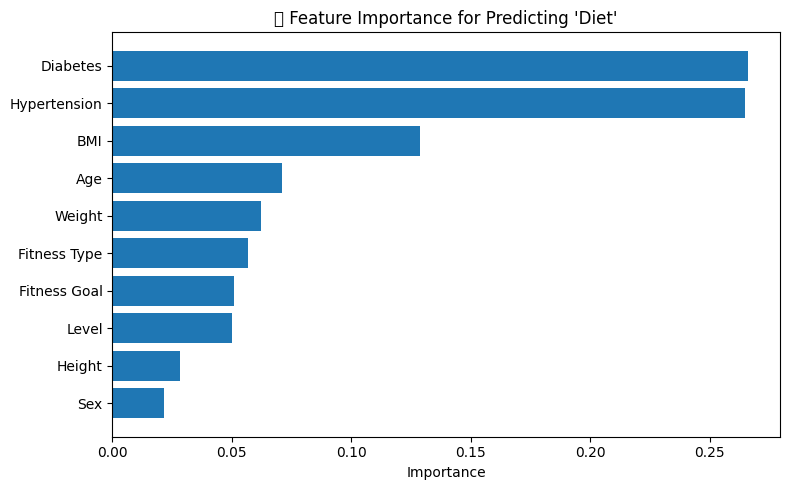

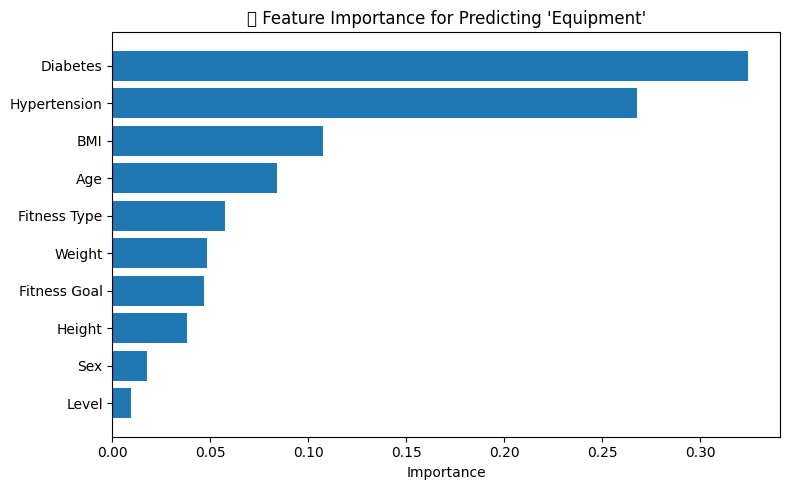

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loop through each target and get feature importances
for i, col in enumerate(y_train.columns):
    estimator = multi_model.estimators_[i]  # Get the model for this target
    importances = estimator.feature_importances_  # Feature importance scores
    feature_names = X_train.columns

    # Create DataFrame for display
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.gca().invert_yaxis()
    plt.title(f"🔍 Feature Importance for Predicting '{col}'")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


In [ ]:
# Loop through each target column and print number of unique classes
for col in y_train.columns:
    unique_vals = y_train[col].nunique()
    print(f"🔢 '{col}' has {unique_vals} unique categories.")


🔢 'Exercises' has 5 unique categories.
🔢 'Diet' has 11 unique categories.
🔢 'Equipment' has 9 unique categories.


<ipython-input-19-52e6b0637f3b>:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


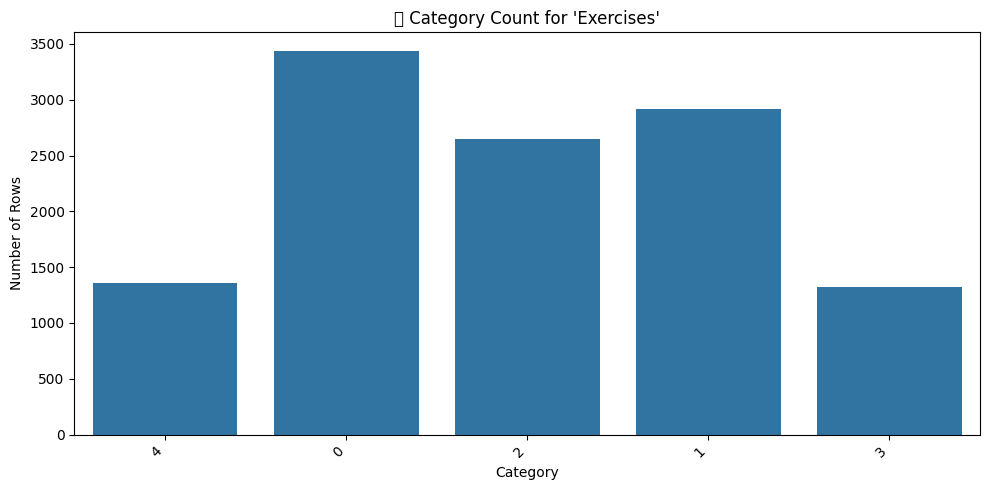

<ipython-input-19-52e6b0637f3b>:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


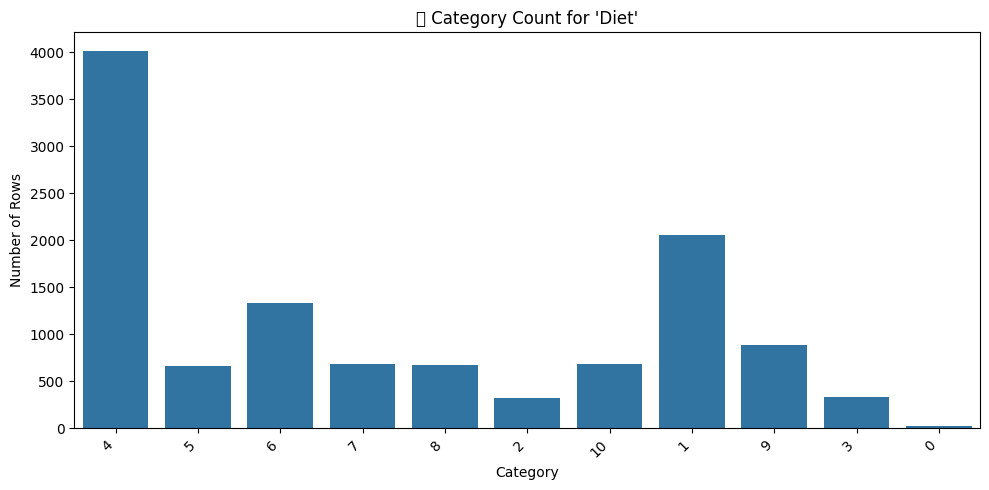

<ipython-input-19-52e6b0637f3b>:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


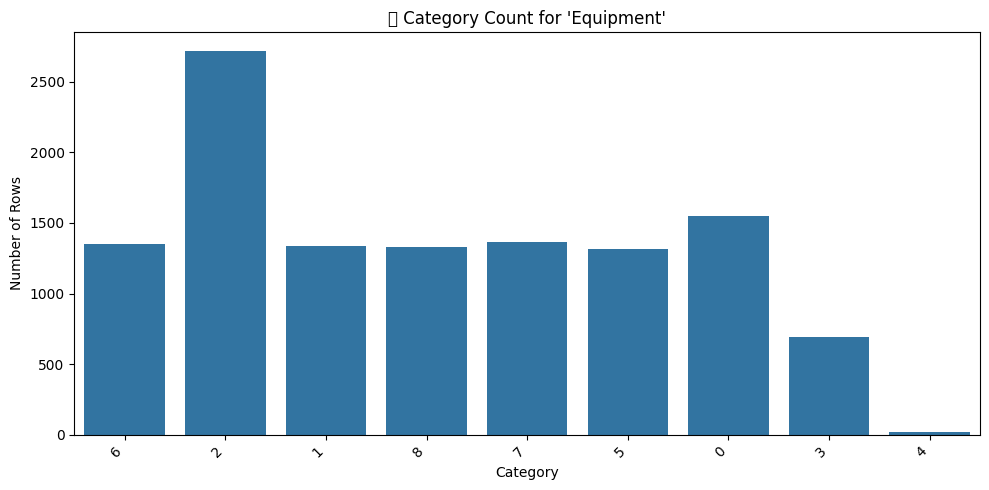

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of each category in every target column
for col in y_train.columns:
    # Get original labels using inverse transform
    decoded_labels = target_encoders[col].inverse_transform(y_train[col])

    # Create bar plot
    plt.figure(figsize=(10, 5))
    sns.countplot(x=decoded_labels)
    plt.title(f"📊 Category Count for '{col}'")
    plt.xlabel("Category")
    plt.ylabel("Number of Rows")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
!pip install imbalanced-learn


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Make predictions
y_pred = multi_model.predict(X_test)

# Step 2: Evaluate each target individually
for i, col in enumerate(y_test.columns):
    print(f"📌 Evaluation for: {col}")
    # Calculate and print accuracy for the current target column
    accuracy = accuracy_score(y_test[col], y_pred[:, i])
    print(f"Accuracy: {accuracy:.4f}") # Format to 4 decimal places
    # Print classification report for the current target column
    print(classification_report(y_test[col], y_pred[:, i]))
    print("="*50)

📌 Evaluation for: Exercises
Accuracy: 0.9973
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       774
           1       1.00      0.99      1.00       716
           2       1.00      1.00      1.00       725
           3       1.00      1.00      1.00       370
           4       1.00      1.00      1.00       333

    accuracy                           1.00      2918
   macro avg       1.00      1.00      1.00      2918
weighted avg       1.00      1.00      1.00      2918

📌 Evaluation for: Diet
Accuracy: 0.9493
              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.97      0.95      0.96       450
           2       0.96      0.97      0.96       164
           3       0.85      0.80      0.82        94
           4       0.72      0.79      0.75        87
           5       0.97      0.98      0.98      1027
           6       0.96      0.93      0.94    

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

# Re-split the data to start fresh with training data for balancing
# (This is just for demonstration purposes; you already have X_train, y_train)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Define the base estimator (will be cloned for each output)
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the MultiOutputClassifier (we will manually fit estimators)
multi_model = MultiOutputClassifier(base_estimator, n_jobs=-1)


# --- Balancing Strategy: Apply SMOTE to each target's training data ---
# This is a common, albeit slightly more manual, approach for multi-output imbalance

balanced_estimators = []
smote = SMOTE(random_state=42)

for i, col in enumerate(y_train.columns):
    print(f"\nBalancing and training model for target: {col}")

    # Get the specific target column for this output
    y_train_col = y_train[col]

    print(f"Original distribution for {col}: {Counter(y_train_col)}")

    # Apply SMOTE to the training data for this specific output
    # SMOTE requires 2D X, so ensure X_train is appropriate
    X_train_res, y_train_col_res = smote.fit_resample(X_train, y_train_col)

    print(f"Resampled distribution for {col}: {Counter(y_train_col_res)}")

    # Clone the base estimator and train it on the resampled data
    estimator = base_estimator.__class__(**base_estimator.get_params()) # Clone the estimator
    estimator.fit(X_train_res, y_train_col_res)

    # Store the fitted estimator
    balanced_estimators.append(estimator)

# Assign the fitted estimators back to the multi_model
multi_model.estimators_ = balanced_estimators
multi_model.n_outputs_ = len(y_train.columns) # Set the number of outputs
multi_model.classes_ = [target_encoders[col].classes_ for col in y_train.columns] # Set classes for each output
# MultiOutputClassifier also expects n_features_in_, which is needed for check_is_fitted
multi_model.n_features_in_ = X_train.shape[1]


print("\n✅ Balancing and training complete for all targets.")

# Now you can proceed to predict and evaluate using the balanced_multi_model
# (The evaluation code from the previous step will work after this)


Balancing and training model for target: Exercises
Original distribution for Exercises: Counter({0: 3432, 1: 2916, 2: 2651, 4: 1354, 3: 1318})
Resampled distribution for Exercises: Counter({4: 3432, 0: 3432, 2: 3432, 1: 3432, 3: 3432})

Balancing and training model for target: Diet
Original distribution for Diet: Counter({5: 4011, 1: 2057, 7: 1329, 10: 887, 8: 683, 2: 680, 9: 678, 6: 662, 4: 335, 3: 328, 0: 21})
Resampled distribution for Diet: Counter({5: 4011, 6: 4011, 7: 4011, 8: 4011, 9: 4011, 3: 4011, 2: 4011, 1: 4011, 10: 4011, 4: 4011, 0: 4011})

Balancing and training model for target: Equipment
Original distribution for Equipment: Counter({2: 2716, 0: 1550, 7: 1363, 6: 1348, 1: 1340, 8: 1329, 5: 1314, 3: 690, 4: 21})
Resampled distribution for Equipment: Counter({6: 2716, 2: 2716, 1: 2716, 8: 2716, 7: 2716, 5: 2716, 0: 2716, 3: 2716, 4: 2716})

✅ Balancing and training complete for all targets.



Balancing and training model for target: Exercises
Original distribution for Exercises: Counter({0: 3432, 1: 2916, 2: 2651, 4: 1354, 3: 1318})
Resampled distribution for Exercises: Counter({4: 3432, 0: 3432, 2: 3432, 1: 3432, 3: 3432})


<ipython-input-23-0f3f8dc72dc3>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_category_counts.index, y=balanced_category_counts.values, palette='viridis')
<ipython-input-23-0f3f8dc72dc3>:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # Adjust layout to prevent labels overlapping
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


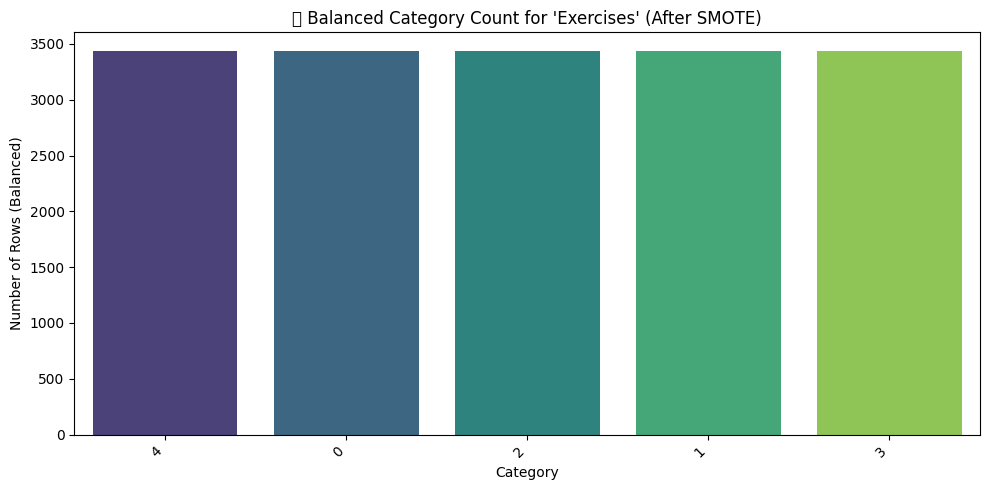


Balancing and training model for target: Diet
Original distribution for Diet: Counter({5: 4011, 1: 2057, 7: 1329, 10: 887, 8: 683, 2: 680, 9: 678, 6: 662, 4: 335, 3: 328, 0: 21})
Resampled distribution for Diet: Counter({5: 4011, 6: 4011, 7: 4011, 8: 4011, 9: 4011, 3: 4011, 2: 4011, 1: 4011, 10: 4011, 4: 4011, 0: 4011})


<ipython-input-23-0f3f8dc72dc3>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_category_counts.index, y=balanced_category_counts.values, palette='viridis')
<ipython-input-23-0f3f8dc72dc3>:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # Adjust layout to prevent labels overlapping
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


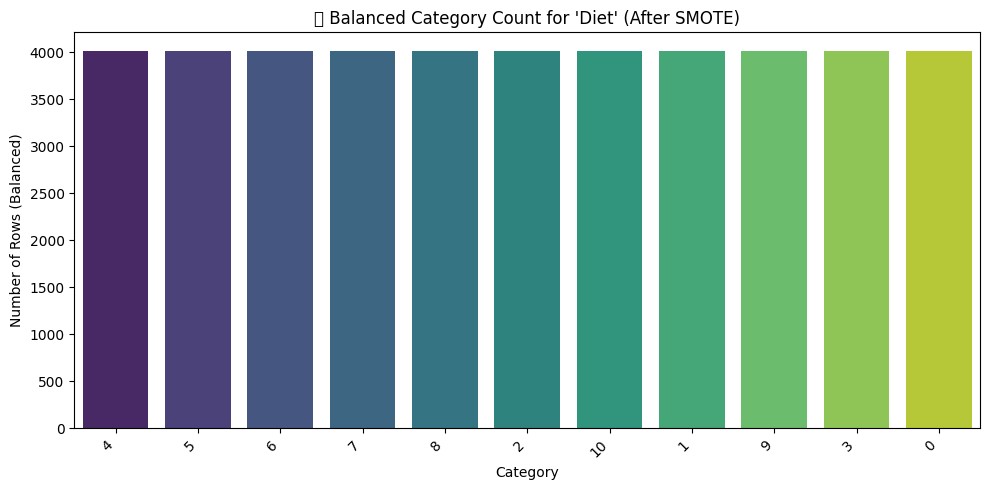


Balancing and training model for target: Equipment
Original distribution for Equipment: Counter({2: 2716, 0: 1550, 7: 1363, 6: 1348, 1: 1340, 8: 1329, 5: 1314, 3: 690, 4: 21})
Resampled distribution for Equipment: Counter({6: 2716, 2: 2716, 1: 2716, 8: 2716, 7: 2716, 5: 2716, 0: 2716, 3: 2716, 4: 2716})


<ipython-input-23-0f3f8dc72dc3>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_category_counts.index, y=balanced_category_counts.values, palette='viridis')
<ipython-input-23-0f3f8dc72dc3>:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # Adjust layout to prevent labels overlapping
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


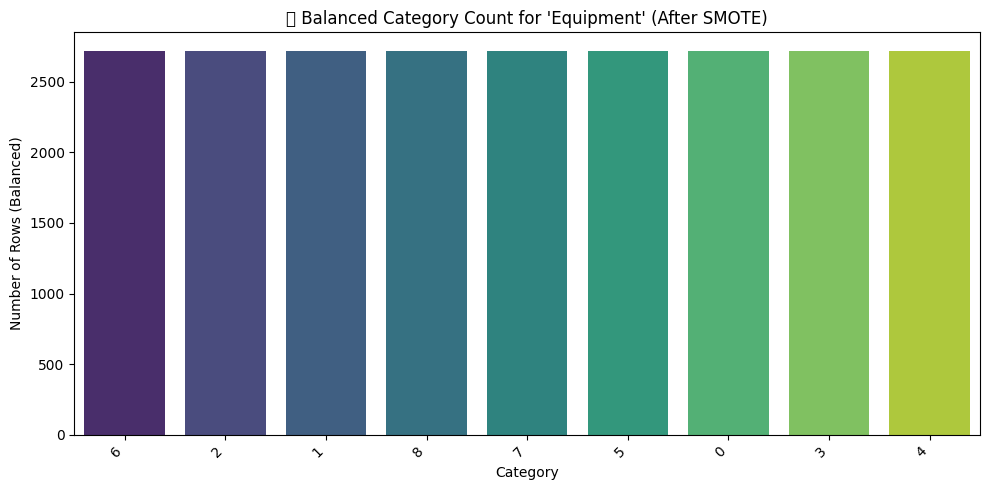


✅ Balancing and training complete for all targets.


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt # Ensure these imports are present
import seaborn as sns

# Re-split the data to start fresh with training data for balancing
# (This is just for demonstration purposes; you already have X_train, y_train)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Define the base estimator (will be cloned for each output)
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the MultiOutputClassifier (we will manually fit estimators)
multi_model = MultiOutputClassifier(base_estimator, n_jobs=-1)


# --- Balancing Strategy: Apply SMOTE to each target's training data and plot ---

balanced_estimators = []
smote = SMOTE(random_state=42)

for i, col in enumerate(y_train.columns):
    print(f"\nBalancing and training model for target: {col}")

    # Get the specific target column for this output
    y_train_col = y_train[col]

    print(f"Original distribution for {col}: {Counter(y_train_col)}")

    # Apply SMOTE to the training data for this specific output
    X_train_res, y_train_col_res = smote.fit_resample(X_train, y_train_col)

    print(f"Resampled distribution for {col}: {Counter(y_train_col_res)}")

    # --- Add Plotting code for the Balanced Data ---
    # We need to decode the resampled labels to their original string format for plotting
    # Use the target_encoders saved earlier
    decoded_resampled_labels = target_encoders[col].inverse_transform(y_train_col_res)

    # Create a pandas Series from the decoded labels and get value counts
    balanced_category_counts = pd.Series(decoded_resampled_labels).value_counts()

    # Create bar plot using the counts of the BALANCED data
    plt.figure(figsize=(10, 5))
    sns.barplot(x=balanced_category_counts.index, y=balanced_category_counts.values, palette='viridis')

    plt.title(f"📊 Balanced Category Count for '{col}' (After SMOTE)")
    plt.xlabel("Category")
    plt.ylabel("Number of Rows (Balanced)")
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()
    # --- End Plotting Code ---

    # Clone the base estimator and train it on the resampled data
    estimator = base_estimator.__class__(**base_estimator.get_params()) # Clone the estimator
    estimator.fit(X_train_res, y_train_col_res)

    # Store the fitted estimator
    balanced_estimators.append(estimator)

# Assign the fitted estimators back to the multi_model
multi_model.estimators_ = balanced_estimators
multi_model.n_outputs_ = len(y_train.columns) # Set the number of outputs
multi_model.classes_ = [target_encoders[col].classes_ for col in y_train.columns] # Set classes for each output
multi_model.n_features_in_ = X_train.shape[1]


print("\n✅ Balancing and training complete for all targets.")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Make predictions on the test set using the balanced model
y_pred = multi_model.predict(X_test)

# Step 2: Evaluate each target individually using the original y_test
for i, col in enumerate(y_test.columns):
    print(f"📌 Evaluation for: {col} (After Training on Balanced Data)")
    # Calculate and print accuracy for the current target column
    # Evaluate on the original test data
    accuracy = accuracy_score(y_test[col], y_pred[:, i])
    print(f"Accuracy: {accuracy:.4f}") # Format to 4 decimal places

    # Print classification report for the current target column
    # This report is crucial for seeing how balancing affected performance on minority classes
    # Ensure the display_labels are correct for the report
    # We use target_encoders[col].classes_ to get the original class names
    print(classification_report(y_test[col], y_pred[:, i], target_names=target_encoders[col].classes_, zero_division=0))
    print("="*50)

📌 Evaluation for: Exercises (After Training on Balanced Data)
Accuracy: 0.9976
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       774
           1       1.00      0.99      1.00       716
           2       1.00      1.00      1.00       725
           3       1.00      1.00      1.00       370
           4       1.00      1.00      1.00       333

    accuracy                           1.00      2918
   macro avg       1.00      1.00      1.00      2918
weighted avg       1.00      1.00      1.00      2918

📌 Evaluation for: Diet (After Training on Balanced Data)
Accuracy: 0.9476
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.98      0.96      0.97       450
          10       0.94      0.97      0.95       164
           2       0.81      0.81      0.81        94
           3       0.70      0.74      0.72        87
           4       0.98      0.97

In [ ]:
import joblib

# Target column names (same order as in y_train and multi_model.estimators_)
target_columns = y_train.columns.tolist()

# Save each model
for i, col in enumerate(target_columns):
    model = multi_model.estimators_[i]
    filename = f"{col}_model.pkl"
    joblib.dump(model, filename)
    print(f"✅ Saved {col} model as '{filename}'")


✅ Saved Exercises model as 'Exercises_model.pkl'
✅ Saved Diet model as 'Diet_model.pkl'
✅ Saved Equipment model as 'Equipment_model.pkl'


In [ ]:
import joblib
import numpy as np

# Step 1: Define target columns (same as during training)
target_columns = y_test.columns.tolist()

# Step 2: Load each model from .pkl
loaded_models = {}
for col in target_columns:
    model = joblib.load(f"{col}_model.pkl")
    loaded_models[col] = model
    print(f"✅ Loaded model: {col}_model.pkl")

# Step 3: Make predictions using each loaded model
predictions = {}
for col in target_columns:
    model = loaded_models[col]
    preds = model.predict(X_test)
    # Decode numeric predictions to original labels
    decoded_preds = target_encoders[col].inverse_transform(preds)
    decoded_actual = target_encoders[col].inverse_transform(y_test[col])

    # Save results
    predictions[col] = {
        "Predicted": decoded_preds,
        "Actual": decoded_actual
    }

    # Print first 5 for quick verification
    print(f"\n🔍 Sample verification for '{col}':")
    for i in range(5):
        print(f"Predicted: {decoded_preds[i]} | Actual: {decoded_actual[i]}")


✅ Loaded model: Exercises_model.pkl
✅ Loaded model: Diet_model.pkl
✅ Loaded model: Equipment_model.pkl

🔍 Sample verification for 'Exercises':
Predicted: 0 | Actual: 0
Predicted: 1 | Actual: 1
Predicted: 2 | Actual: 2
Predicted: 3 | Actual: 3
Predicted: 1 | Actual: 1

🔍 Sample verification for 'Diet':
Predicted: 1 | Actual: 1
Predicted: 9 | Actual: 9
Predicted: 6 | Actual: 6
Predicted: 4 | Actual: 4
Predicted: 9 | Actual: 9

🔍 Sample verification for 'Equipment':
Predicted: 3 | Actual: 3
Predicted: 0 | Actual: 0
Predicted: 8 | Actual: 8
Predicted: 5 | Actual: 5
Predicted: 0 | Actual: 0


In [ ]:


!pip install gradio



In [ ]:
import joblib

# Save label encoders for input features
joblib.dump(label_encoders, "label_encoders.pkl")
print("✅ Saved label_encoders.pkl")

# Save label encoders for target outputs
joblib.dump(target_encoders, "target_encoders.pkl")
print("✅ Saved target_encoders.pkl")


✅ Saved label_encoders.pkl
✅ Saved target_encoders.pkl


In [ ]:
import joblib

# Save input encoders
joblib.dump(label_encoders, "label_encoders.pkl")

# Save output encoders
joblib.dump(target_encoders, "target_encoders.pkl")


['target_encoders.pkl']

In [ ]:
for col, le in label_encoders.items():
    print(f"{col}: {list(le.classes_)}")


Sex: ['0', '1']
Hypertension: ['0', '1']
Diabetes: ['0', '1']
Level: ['0', '1', '2', '3']
Fitness Goal: ['0', '1']
Fitness Type: ['0', '1']


In [ ]:
def predict_gym_plan(sex, age, bmi, hypertension, diabetes, level, goal, fitness_type):
    try:
        input_data = {
            'Sex': sex,
            'Age': int(age),
            'BMI': float(bmi),
            'Hypertension': hypertension,
            'Diabetes': diabetes,
            'Level': level,
            'Fitness Goal': goal,
            'Fitness Type': fitness_type
        }

        df_input = pd.DataFrame([input_data])

        for col in label_encoders:
            df_input[col] = label_encoders[col].transform(df_input[col])

        ex_pred = exercise_model.predict(df_input)[0]
        diet_pred = diet_model.predict(df_input)[0]
        eqp_pred = equipment_model.predict(df_input)[0]

        ex_label = target_encoders['Exercises'].inverse_transform([ex_pred])[0]
        diet_label = target_encoders['Diet'].inverse_transform([diet_pred])[0]
        eqp_label = target_encoders['Equipment'].inverse_transform([eqp_pred])[0]

        return ex_label, diet_label, eqp_label

    except Exception as e:
        return str(e), str(e), str(e)


In [ ]:
correct_order = ['Sex', 'Age', 'BMI', 'Height', 'Weight',
                 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type']
df_input = df[correct_order]


In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load models
exercise_model = joblib.load("Exercises_model.pkl")
diet_model = joblib.load("Diet_model.pkl")
equipment_model = joblib.load("Equipment_model.pkl")

# Load encoders
target_encoders = joblib.load("target_encoders.pkl")  # Make sure this was saved earlier

# Prediction function
def predict_gym_plan(sex, age, bmi, height, weight, hypertension, diabetes, level, goal, fitness_type):
    try:
        # Input validation
        required_fields = {
            "Age": age, "BMI": bmi, "Height": height, "Weight": weight,
            "Sex": sex, "Hypertension": hypertension, "Diabetes": diabetes,
            "Level": level, "Fitness Goal": goal, "Fitness Type": fitness_type
        }
        for field, value in required_fields.items():
            if value is None or value == "":
                raise ValueError(f"{field} cannot be empty.")

        # Manual encoding maps
        map_sex = {'Male': 1, 'Female': 0}
        map_yes_no = {'Yes': 1, 'No': 0}
        map_level = {'Beginner': 0, 'Intermediate': 1, 'Advanced': 2}
        map_goal = {'Fitness': 0, 'Muscle Gain': 1, 'Weight Loss': 2}
        map_type = {'Cardio': 0, 'Mixed': 1, 'Strength': 2}

        # Construct feature dict
        input_data = {
            'Sex': map_sex[sex],
            'Age': int(age),
            'BMI': float(bmi),
            'Height': float(height),
            'Weight': float(weight),
            'Hypertension': map_yes_no[hypertension],
            'Diabetes': map_yes_no[diabetes],
            'Level': map_level[level],
            'Fitness Goal': map_goal[goal],
            'Fitness Type': map_type[fitness_type]
        }

        df_input = pd.DataFrame([input_data])

        # Force correct feature order
        correct_order = ['Sex', 'Age', 'BMI', 'Height', 'Weight',
                         'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type']
        df_input = df_input[correct_order]

        # Load models
        ex_model = joblib.load("Exercises_model.pkl")
        diet_model = joblib.load("Diet_model.pkl")
        eqp_model = joblib.load("Equipment_model.pkl")
        target_encoders = joblib.load("target_encoders.pkl")

        # Predict
        ex_pred = ex_model.predict(df_input)[0]
        diet_pred = diet_model.predict(df_input)[0]
        eqp_pred = eqp_model.predict(df_input)[0]

        # Decode predictions
        ex_label = target_encoders['Exercises'].inverse_transform([ex_pred])[0]
        diet_label = target_encoders['Diet'].inverse_transform([diet_pred])[0]
        eqp_label = target_encoders['Equipment'].inverse_transform([eqp_pred])[0]

        return ex_label, diet_label, eqp_label

    except Exception as e:
        err = f"❌ Error: {str(e)}"
        return err, err, err


# Gradio Interface
inputs = [
    gr.Radio(['Male', 'Female'], label="Sex"),
    gr.Number(label="Age"),
    gr.Number(label="BMI"),
    gr.Number(label="Height (in cm)"),
    gr.Number(label="Weight (in kg)"),
    gr.Radio(['Yes', 'No'], label="Hypertension"),
    gr.Radio(['Yes', 'No'], label="Diabetes"),
    gr.Dropdown(['Beginner', 'Intermediate', 'Advanced'], label="Level"),
    gr.Dropdown(['Fitness', 'Muscle Gain', 'Weight Loss'], label="Fitness Goal"),
    gr.Dropdown(['Cardio', 'Mixed', 'Strength'], label="Fitness Type")
]

outputs = [
    gr.Text(label="🏋️ Recommended Exercises"),
    gr.Text(label="🥗 Recommended Diet"),
    gr.Text(label="🛠️ Recommended Equipment")
]

gr.Interface(
    fn=predict_gym_plan,
    inputs=inputs,
    outputs=outputs,
    title="💪 Personalized Gym Recommendation System",
    description="Enter your fitness profile to receive exercise, diet, and equipment recommendations."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a6193667b2d8c5f0a2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(target_encoders, "target_encoders.pkl")


['target_encoders.pkl']

In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load models and encoders
exercise_model = joblib.load("Exercises_model.pkl")
diet_model = joblib.load("Diet_model.pkl")
equipment_model = joblib.load("Equipment_model.pkl")
target_encoders = joblib.load("target_encoders.pkl")

# Final prediction function
def predict_gym_plan(sex, age, bmi, height, weight, hypertension, diabetes, level, goal, fitness_type):
    try:
        # Validate inputs
        required_fields = {
            "Age": age, "BMI": bmi, "Height": height, "Weight": weight,
            "Sex": sex, "Hypertension": hypertension, "Diabetes": diabetes,
            "Level": level, "Fitness Goal": goal, "Fitness Type": fitness_type
        }
        for field, value in required_fields.items():
            if value is None or value == "":
                raise ValueError(f"{field} cannot be empty.")

        # Mapping for categorical values
        map_sex = {'Male': 1, 'Female': 0}
        map_yes_no = {'Yes': 1, 'No': 0}
        map_level = {'Beginner': 0, 'Intermediate': 1, 'Advanced': 2}
        map_goal = {'Fitness': 0, 'Muscle Gain': 1, 'Weight Loss': 2}
        map_type = {'Cardio': 0, 'Mixed': 1, 'Strength': 2}

        # Create input dictionary
        input_data = {
            'Sex': map_sex[sex],
            'Age': int(age),
            'BMI': float(bmi),
            'Height': float(height),
            'Weight': float(weight),
            'Hypertension': map_yes_no[hypertension],
            'Diabetes': map_yes_no[diabetes],
            'Level': map_level[level],
            'Fitness Goal': map_goal[goal],
            'Fitness Type': map_type[fitness_type]
        }

        # Create DataFrame and enforce correct order
        df_input = pd.DataFrame([input_data])
        correct_order = [
            'Sex', 'Age', 'BMI', 'Height', 'Weight',
            'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 'Fitness Type'
        ]
        df_input = df_input[correct_order]

        # Predict with each model
        ex_pred = exercise_model.predict(df_input)[0]
        diet_pred = diet_model.predict(df_input)[0]
        eqp_pred = equipment_model.predict(df_input)[0]

        # Decode predictions
        ex_label = target_encoders['Exercises'].inverse_transform([ex_pred])[0]
        diet_label = target_encoders['Diet'].inverse_transform([diet_pred])[0]
        eqp_label = target_encoders['Equipment'].inverse_transform([eqp_pred])[0]

        return ex_label, diet_label, eqp_label

    except Exception as e:
        err = f"❌ Error: {str(e)}"
        return err, err, err

# Gradio UI
inputs = [
    gr.Radio(['Male', 'Female'], label="Sex"),
    gr.Number(label="Age"),
    gr.Number(label="BMI"),
    gr.Number(label="Height (in cm)"),
    gr.Number(label="Weight (in kg)"),
    gr.Radio(['Yes', 'No'], label="Hypertension"),
    gr.Radio(['Yes', 'No'], label="Diabetes"),
    gr.Dropdown(['Beginner', 'Intermediate', 'Advanced'], label="Level"),
    gr.Dropdown(['Fitness', 'Muscle Gain', 'Weight Loss'], label="Fitness Goal"),
    gr.Dropdown(['Cardio', 'Mixed', 'Strength'], label="Fitness Type")
]

outputs = [
    gr.Text(label="🏋️ Recommended Exercises"),
    gr.Text(label="🥗 Recommended Diet"),
    gr.Text(label="🛠️ Recommended Equipment")
]

gr.Interface(
    fn=predict_gym_plan,
    inputs=inputs,
    outputs=outputs,
    title="💪 Personalized Gym Recommendation System",
    description="Enter your fitness profile to receive custom recommendations for exercises, diet, and equipment."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://80952ed3ef2df7566f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
